In [1]:
import re
import pandas as pd
from venn import venn

In [2]:
plink_r1 = pd.read_excel("../pLink/MatzingerR1_Analysis/result_annikaFormat.xlsx")
plink_r2 = pd.read_excel("../pLink/MatzingerR2_Analysis/result_annikaFormat.xlsx")
plink_r3 = pd.read_excel("../pLink/MatzingerR3_Analysis/result_annikaFormat.xlsx")
maxlynx_r1 = pd.read_excel("../MaxLynx/MatzingerR1_Analysis/crosslinkMsms.txt_annikaFormat.xlsx")
maxlynx_r2 = pd.read_excel("../MaxLynx/MatzingerR2_Analysis/crosslinkMsms.txt_annikaFormat.xlsx")
maxlynx_r3 = pd.read_excel("../MaxLynx/MatzingerR3_Analysis/crosslinkMsms.txt_annikaFormat.xlsx")
annika_r1 = pd.read_excel("../MS_Annika/Results/standard_deiso/R1_standard_deiso.xlsx")
annika_r2 = pd.read_excel("../MS_Annika/Results/standard_deiso/R2_standard_deiso.xlsx")
annika_r3 = pd.read_excel("../MS_Annika/Results/standard_deiso/R3_standard_deiso.xlsx")

In [3]:
def get_unique_xl(df):
    unique_xl = set()
    for i, row in df.iterrows():
        seq1 = str(row["Sequence A"]).replace("[", "").replace("]", "").strip().upper()
        seq2 = str(row["Sequence B"]).replace("[", "").replace("]", "").strip().upper()
        pos1 = str(int(row["Position A"]))
        pos2 = str(int(row["Position B"]))
        crosslink = "-".join(sorted([seq1 + pos1, seq2 + pos2]))
        unique_xl.add(crosslink)
    print(len(unique_xl), df.shape[0])
    assert len(unique_xl) <= df.shape[0]
    if len(unique_xl) < df.shape[0]:
        print(f"Found {df.shape[0] - len(unique_xl)} duplicate crosslinks.")
    return unique_xl

In [4]:
def get_seq(xl):
    return re.sub(r"[^A-Z]", "", xl)

def get_pos(xl):
    return int(re.sub(r"[^0-9]", "", xl))
               
def crosslinks_to_df(xls, filename):
    nrows = len(xls)
    Checked = ["FALSE" for i in range(nrows)]
    Crosslinker = ["DSS" for i in range(nrows)]
    Crosslink_Type = ["Unknown" for i in range(nrows)]
    CSMs = [0 for i in range(nrows)]
    Proteins = [0 for i in range(nrows)]
    Sequence_A = [get_seq(xl.split("-")[0]) for xl in xls]
    Accession_A = ["Unknown" for i in range(nrows)]
    Position_A = [get_pos(xl.split("-")[0]) for xl in xls]
    Sequence_B = [get_seq(xl.split("-")[1]) for xl in xls]
    Accession_B = ["Unknown" for i in range(nrows)]
    Position_B = [get_pos(xl.split("-")[1]) for xl in xls]
    Protein_Descriptions_A = ["" for i in range(nrows)]
    Protein_Descriptions_B = ["" for i in range(nrows)]
    Best_CSM_Score = [0.0 for i in range(nrows)]
    In_protein_A = [0 for i in range(nrows)]
    In_protein_B = [0 for i in range(nrows)]
    Decoy = ["FALSE" for i in range(nrows)]
    Modifications_A = ["" for i in range(nrows)]
    Modifications_B = ["" for i in range(nrows)]
    Confidence = ["High" for i in range(nrows)]

    # create annika dataframe
    df = pd.DataFrame({"Checked": Checked,
                       "Crosslinker": Crosslinker,
                       "Crosslink Type": Crosslink_Type,
                       "# CSMs": CSMs,
                       "# Proteins": Proteins,
                       "Sequence A": Sequence_A,
                       "Accession A": Accession_A,
                       "Position A": Position_A,
                       "Sequence B": Sequence_B,
                       "Accession B": Accession_B,
                       "Position B": Position_B,
                       "Protein Descriptions A": Protein_Descriptions_A,
                       "Protein Descriptions B": Protein_Descriptions_B,
                       "Best CSM Score": Best_CSM_Score,
                       "In protein A": In_protein_A,
                       "In protein B": In_protein_B,
                       "Decoy": Decoy,
                       "Modifications A": Modifications_A,
                       "Modifications B": Modifications_B,
                       "Confidence": Confidence})

    df.to_excel(filename)

    return df

In [5]:
plink_r1_xl = get_unique_xl(plink_r1)
plink_r2_xl = get_unique_xl(plink_r2)
plink_r3_xl = get_unique_xl(plink_r3)

116 116
112 112
122 123
Found 1 duplicate crosslinks.


In [6]:
maxlynx_r1_xl = get_unique_xl(maxlynx_r1)
maxlynx_r2_xl = get_unique_xl(maxlynx_r2)
maxlynx_r3_xl = get_unique_xl(maxlynx_r3)

120 120
115 115
105 105


In [7]:
annika_r1_xl = get_unique_xl(annika_r1)
annika_r2_xl = get_unique_xl(annika_r2)
annika_r3_xl = get_unique_xl(annika_r3)

101 101
93 93
84 84


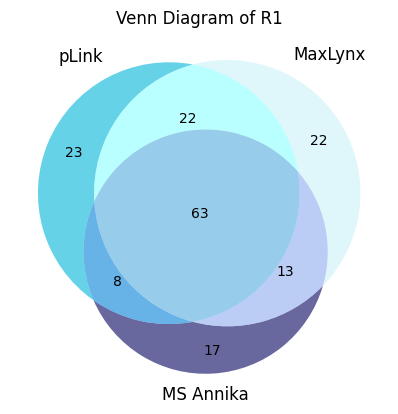

In [8]:
venn(plink_r1_xl, maxlynx_r1_xl, annika_r1_xl,
     labels = ["pLink", "MaxLynx", "MS Annika"],
     colors = ["#00b4d8", "#caf0f8", "#03045e"],
     title = "Venn Diagram of R1",
     filename = "R1_Venn");

In [9]:
crosslinks_to_df(plink_r1_xl.intersection(maxlynx_r1_xl, annika_r1_xl), "R1_intersection.xlsx");
crosslinks_to_df(plink_r1_xl.union(maxlynx_r1_xl, annika_r1_xl), "R1_union.xlsx");

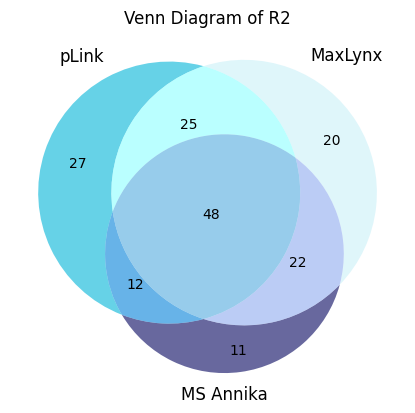

In [10]:
venn(plink_r2_xl, maxlynx_r2_xl, annika_r2_xl,
     labels = ["pLink", "MaxLynx", "MS Annika"],
     colors = ["#00b4d8", "#caf0f8", "#03045e"],
     title = "Venn Diagram of R2",
     filename = "R2_Venn");

In [11]:
crosslinks_to_df(plink_r2_xl.intersection(maxlynx_r2_xl, annika_r2_xl), "R2_intersection.xlsx");
crosslinks_to_df(plink_r2_xl.union(maxlynx_r2_xl, annika_r2_xl), "R2_union.xlsx");

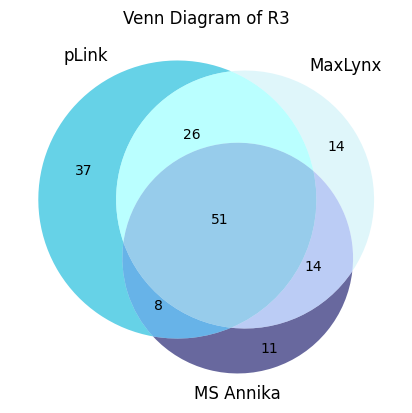

In [12]:
venn(plink_r3_xl, maxlynx_r3_xl, annika_r3_xl,
     labels = ["pLink", "MaxLynx", "MS Annika"],
     colors = ["#00b4d8", "#caf0f8", "#03045e"],
     title = "Venn Diagram of R3",
     filename = "R3_Venn");

In [13]:
crosslinks_to_df(plink_r3_xl.intersection(maxlynx_r3_xl, annika_r3_xl), "R3_intersection.xlsx");
crosslinks_to_df(plink_r3_xl.union(maxlynx_r3_xl, annika_r3_xl), "R3_union.xlsx");